In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Malta_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/50188,Cosy fully renovated farmhouse Gozo,Xewkija is a small village found on the island...,"Felix the butcher , the bakery and the mini ma...",https://a0.muscache.com/pictures/39216710/b3fa...,Alexandra,2015-09-29,Desconocido,-%,f,...,4.83,4.95,4.95,4.62,4.79,1.0,1.0,0.0,0.0,1.32
1,https://www.airbnb.com/rooms/53723,Studio apartment Apt.3,A tastefully converted open plan apartment who...,"Located right in the heart of Valletta, a worl...",https://a0.muscache.com/pictures/1eeb37c2-16f6...,Michael,2010-10-02,within a few hours,100%,t,...,4.79,4.95,4.97,4.97,4.69,4.0,4.0,0.0,0.0,1.09
2,https://www.airbnb.com/rooms/102120,4 Bedroom Family-run House with Pool,Air conditioning in 3 bedrooms (on a pay-per-u...,The village square is just a few minutes away....,https://a0.muscache.com/pictures/prohost-api/H...,Michael,2011-04-25,within an hour,94%,t,...,4.59,4.89,4.93,4.52,4.80,7.0,7.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/109123,Penthouse Apartment.,Our place is located in a small town called Na...,I can tell where the best places are for break...,https://a0.muscache.com/pictures/724159/6277e4...,Lino And Rose,2011-05-05,within an hour,100%,t,...,4.86,4.96,4.94,4.82,4.90,3.0,3.0,0.0,0.0,0.79
4,https://www.airbnb.com/rooms/113998,Residence Rouge™ 1 Floriana Valletta.,Hi and welcome to Residence Rouge.<br />Our 20...,No se proporcionan detalles,https://a0.muscache.com/pictures/744058/a7f0aa...,Alan,2011-05-11,a few days or more,13%,f,...,4.78,4.84,4.91,4.80,4.69,7.0,7.0,0.0,0.0,1.25


In [6]:
f1=df.iloc[ :  , [8,9,10,12,13,21,27,28,31,42] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,-%,f,t,Entire villa,Entire home/apt,f,6.0,2.5,160.0,4.83
1,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,100.0,4.79
2,94%,t,t,Entire home,Entire home/apt,f,8.0,1.4,83.0,4.59
3,100%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,55.0,4.86
4,13%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,49.0,4.78
...,...,...,...,...,...,...,...,...,...,...
12604,100%,f,t,Entire rental unit,Entire home/apt,t,5.0,2.0,157.0,5.00
12605,94%,t,t,Private room in home,Private room,f,2.0,1.0,50.0,5.00
12606,100%,f,t,Entire rental unit,Entire home/apt,t,4.0,1.0,85.0,5.00
12607,100%,t,t,Entire rental unit,Entire home/apt,t,6.0,2.0,128.0,5.00


In [7]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\valer\AppData\Local\Temp\ipykernel_30424\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_30424\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\valer\AppData\Local\Temp\ipykernel_30424\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [8]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 3)]

In [9]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 13 to 12601
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         382 non-null    float64
 1   host_is_superhost          382 non-null    int64  
 2   host_identity_verified     382 non-null    int64  
 3   property_type              382 non-null    int64  
 4   room_type                  382 non-null    int64  
 5   instant_bookable           382 non-null    int64  
 6   accommodates               382 non-null    float64
 7   bathrooms                  382 non-null    float64
 8   price                      382 non-null    float64
 9   review_scores_cleanliness  382 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 32.8 KB


<Axes: xlabel='room_type', ylabel='price'>

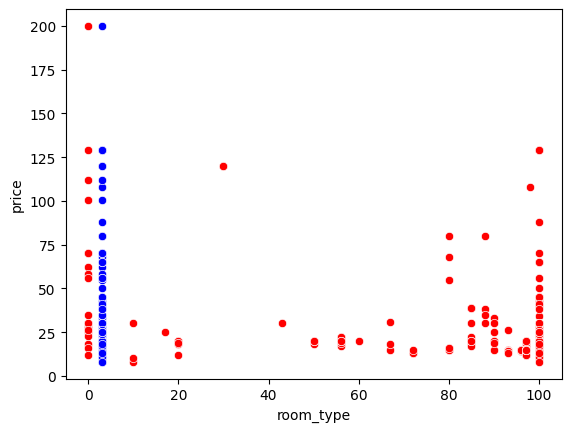

In [10]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

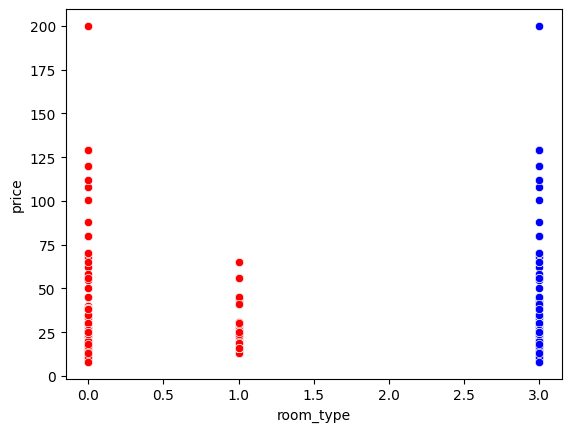

In [11]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

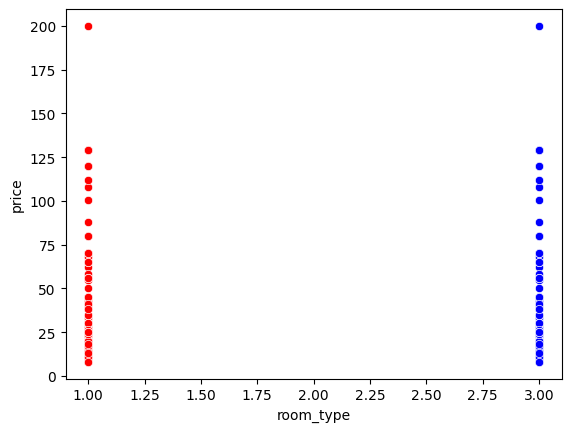

In [12]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

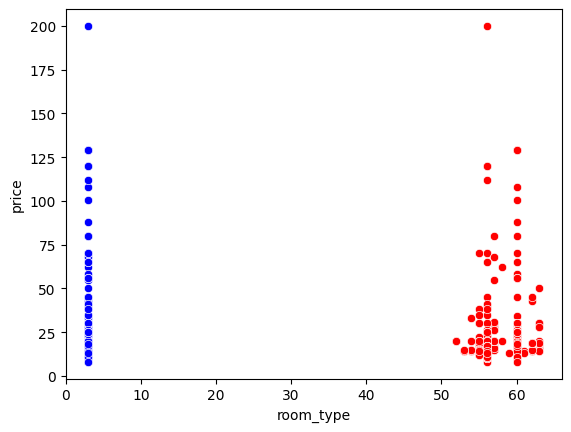

In [13]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

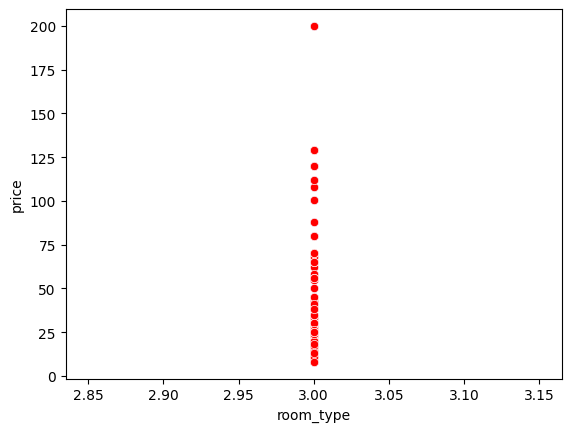

In [14]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

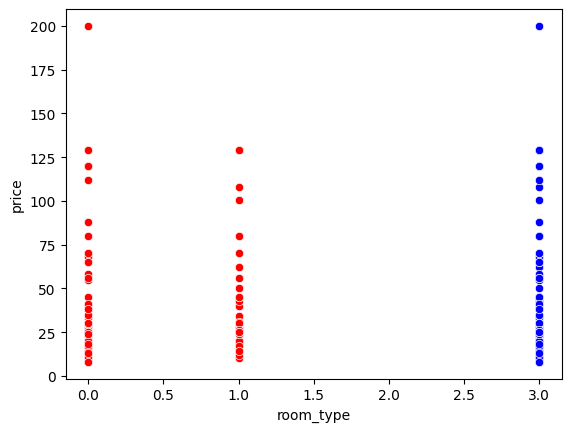

In [15]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

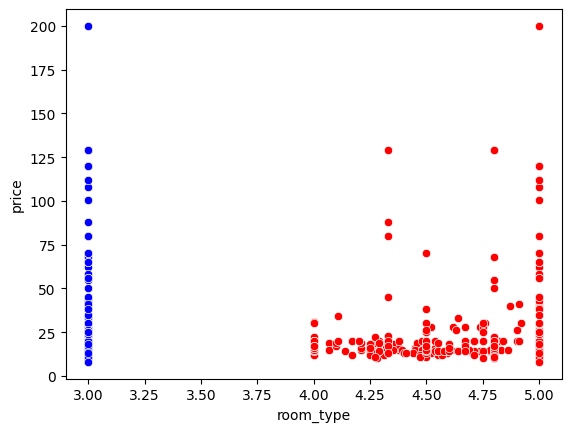

In [16]:
from turtle import color 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

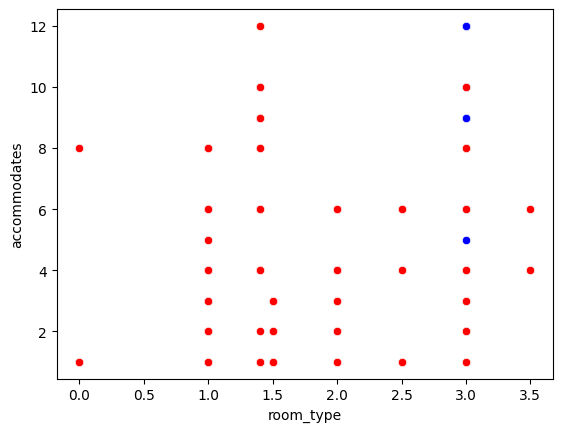

In [17]:
from turtle import color 
sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

In [18]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [19]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

In [20]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [21]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [22]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.19875048]),
 'rank_': 1,
 'singular_': array([596.88345921]),
 'intercept_': np.float64(40.009156980008)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.61185984]),
 'rank_': 1,
 'singular_': array([6.75622653]),
 'intercept_': np.float64(23.142857142857146)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(23.227748691099478)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(23.227748691099478)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.2212129]),
 'rank_': 1,
 'singular_': array([50.84544387]),
 'intercept_': np.float64(10.432725207048783)}

In [28]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.28370481]),
 'rank_': 1,
 'singular_': array([7.72430718]),
 'intercept_': np.float64(21.62305194805195)}

In [29]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([9.95897627]),
 'rank_': 1,
 'singular_': array([6.26638604]),
 'intercept_': np.float64(-23.562493879673468)}

In [30]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.64906429]),
 'rank_': 1,
 'singular_': array([13.8434374]),
 'intercept_': np.float64(1.4942268317534015)}

**Prediccion de valores**

In [31]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([20.92911095, 20.13410903, 20.13410903, 20.13410903, 20.13410903,
       20.13410903, 20.13410903, 40.00915698, 20.13410903, 20.13410903,
       20.13410903, 20.13410903, 20.13410903, 20.53160999, 20.13410903,
       20.13410903, 40.00915698, 20.13410903, 40.00915698, 20.13410903,
       20.13410903, 20.92911095, 20.92911095, 28.08412821, 20.13410903,
       20.13410903, 20.13410903, 20.13410903, 20.73036047, 40.00915698,
       20.73036047, 20.73036047, 20.73036047, 20.73036047, 20.73036047,
       20.13410903, 20.13410903, 20.13410903, 20.73036047, 20.73036047,
       20.73036047, 20.73036047, 20.73036047, 20.73036047, 20.92911095,
       20.73036047, 20.73036047, 24.10911862, 26.69287485, 24.10911862,
       26.69287485, 24.10911862, 24.10911862, 24.10911862, 20.92911095,
       20.92911095, 24.10911862, 24.10911862, 24.10911862, 40.00915698,
       20.13410903, 20.73036047, 20.73036047, 20.13410903, 25.69912245,
       25.69912245, 20.13410903, 20.13410903, 25.69912245, 20.13

In [32]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([23.14285714, 23.75471698, 23.75471698, 23.75471698, 23.75471698,
       23.14285714, 23.75471698, 23.14285714, 23.75471698, 23.75471698,
       23.75471698, 23.14285714, 23.75471698, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.75471698, 23.14285714,
       23.75471698, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14285714,
       23.14285714, 23.14285714, 23.14285714, 23.14285714, 23.14

In [33]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22

In [34]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22774869,
       23.22774869, 23.22774869, 23.22774869, 23.22774869, 23.22

In [35]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([22.37822167, 23.04186037, 23.04186037, 23.04186037, 23.04186037,
       24.36913775, 23.04186037, 23.04186037, 23.04186037, 23.04186037,
       23.04186037, 22.82064747, 23.70549906, 23.70549906, 23.70549906,
       23.70549906, 23.70549906, 22.82064747, 23.70549906, 23.70549906,
       24.36913775, 22.37822167, 22.37822167, 22.37822167, 22.82064747,
       22.82064747, 22.82064747, 22.82064747, 24.36913775, 23.70549906,
       24.36913775, 24.36913775, 24.36913775, 24.36913775, 24.36913775,
       24.36913775, 24.36913775, 23.70549906, 24.36913775, 24.36913775,
       24.36913775, 24.36913775, 24.36913775, 24.36913775, 24.14792485,
       24.36913775, 24.36913775, 23.04186037, 23.04186037, 23.04186037,
       23.04186037, 23.04186037, 23.04186037, 23.04186037, 24.14792485,
       24.14792485, 23.04186037, 23.04186037, 23.04186037, 24.36913775,
       21.93579588, 24.36913775, 24.36913775, 21.93579588, 22.82064747,
       23.48428616, 23.04186037, 22.82064747, 22.82064747, 23.04

In [36]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([21.62305195, 29.90675676, 29.90675676, 29.90675676, 29.90675676,
       21.62305195, 29.90675676, 21.62305195, 29.90675676, 29.90675676,
       29.90675676, 21.62305195, 21.62305195, 29.90675676, 29.90675676,
       29.90675676, 21.62305195, 21.62305195, 21.62305195, 21.62305195,
       29.90675676, 21.62305195, 21.62305195, 21.62305195, 29.90675676,
       29.90675676, 29.90675676, 29.90675676, 21.62305195, 29.90675676,
       21.62305195, 21.62305195, 21.62305195, 21.62305195, 21.62305195,
       21.62305195, 21.62305195, 29.90675676, 21.62305195, 21.62305195,
       21.62305195, 21.62305195, 21.62305195, 21.62305195, 21.62305195,
       21.62305195, 21.62305195, 21.62305195, 29.90675676, 21.62305195,
       29.90675676, 21.62305195, 21.62305195, 21.62305195, 21.62305195,
       21.62305195, 21.62305195, 21.62305195, 21.62305195, 21.62305195,
       21.62305195, 21.62305195, 21.62305195, 21.62305195, 21.62305195,
       21.62305195, 21.62305195, 21.62305195, 21.62305195, 21.62

In [37]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([23.64305364, 23.84223317, 22.44797649, 22.94592531, 23.64305364,
       21.45207886, 22.54756625, 19.7590529 , 25.43566937, 25.23648985,
       25.23648985, 21.25289934, 26.23238747, 26.23238747, 16.97053954,
       17.36889859, 26.23238747, 26.23238747, 26.23238747, 20.05782219,
       24.24059222, 24.14100246, 23.04551507, 24.43977175, 24.93772056,
       26.23238747, 26.23238747, 26.23238747, 19.06192456, 19.55987337,
       20.75495053, 18.36479622, 22.34838673, 24.24059222, 20.95413005,
       26.23238747, 26.23238747, 21.25289934, 16.97053954, 24.24059222,
       17.26930883, 20.05782219, 16.2734112 , 21.65125839, 19.55987337,
       24.24059222, 20.85454029, 20.75495053, 16.2734112 , 18.86274503,
       24.53936151, 18.36479622, 24.24059222, 19.55987337, 18.86274503,
       20.15741195, 21.05371981, 24.24059222, 19.46028361, 23.74264341,
       19.16151432, 20.05782219, 17.26930883, 18.26520646, 22.04961744,
       20.65536076, 23.34428436, 21.65125839, 22.1492072 , 17.96

In [38]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([2.14329112, 3.11688755, 3.11688755, 3.11688755, 3.11688755,
       3.44141969, 3.11688755, 2.40291683, 3.11688755, 3.11688755,
       2.46782326, 2.14329112, 2.14329112, 2.14329112, 2.14329112,
       2.14329112, 2.14329112, 2.14329112, 2.46782326, 2.14329112,
       2.14329112, 2.46782326, 2.14329112, 2.14329112, 2.14329112,
       2.14329112, 2.14329112, 2.14329112, 2.79235541, 2.14329112,
       2.79235541, 2.79235541, 2.79235541, 2.79235541, 2.79235541,
       3.44141969, 3.44141969, 2.46782326, 2.79235541, 2.79235541,
       2.79235541, 2.79235541, 2.79235541, 2.79235541, 2.14329112,
       2.79235541, 2.79235541, 2.14329112, 2.40291683, 2.14329112,
       2.40291683, 2.14329112, 2.14329112, 2.14329112, 2.14329112,
       2.14329112, 3.44141969, 3.44141969, 2.14329112, 2.46782326,
       2.40291683, 2.79235541, 2.79235541, 2.79235541, 3.11688755,
       3.11688755, 2.40291683, 2.40291683, 3.11688755, 2.40291683,
       2.40291683, 2.40291683, 2.14329112, 2.14329112, 2.46782

In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,23.227749,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,23.227749,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,23.227749,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,23.227749,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,23.227749,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,23.227749,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,23.227749,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,23.227749,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,23.227749,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,23.227749,23.227749,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,23.227749,23.227749,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,23.227749,23.227749,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,23.227749,23.227749,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,23.227749,23.227749,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,23.227749,23.227749,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,23.227749,23.227749,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,23.227749,23.227749,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,23.227749,23.227749,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,23.227749,23.227749,22.378222,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,23.227749,23.227749,23.041860,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,23.227749,23.227749,23.041860,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,23.227749,23.227749,23.041860,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,23.227749,23.227749,23.041860,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,23.227749,23.227749,23.705499,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,23.227749,23.227749,23.705499,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,23.227749,23.227749,23.705499,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,23.227749,23.227749,22.820647,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [44]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,23.227749,23.227749,22.378222,21.623052,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,23.227749,23.227749,22.820647,21.623052,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [45]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,23.227749,23.227749,22.378222,21.623052,23.643054,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,23.842233,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,22.447976,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,22.945925,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,23.643054,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,26.232387,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,26.232387,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,26.232387,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,23.227749,23.227749,22.820647,21.623052,26.232387,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


In [46]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
13,20.929111,23.142857,23.227749,23.227749,22.378222,21.623052,23.643054,2.143291,96.0,0,1,54,3,0,3.0,1.0,14.0,4.74
129,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,23.842233,3.116888,100.0,1,1,57,3,1,1.0,2.5,30.0,4.76
133,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,22.447976,3.116888,100.0,1,1,57,3,1,1.0,2.5,28.0,4.62
136,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,22.945925,3.116888,100.0,1,1,57,3,1,1.0,2.5,28.0,4.67
137,20.134109,23.754717,23.227749,23.227749,23.041860,29.906757,23.643054,3.116888,100.0,1,1,57,3,1,1.0,2.5,28.0,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12465,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,26.232387,3.116888,100.0,0,1,60,3,0,1.0,2.5,11.0,5.00
12467,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,26.232387,3.116888,100.0,0,1,60,3,0,1.0,2.5,8.0,5.00
12519,20.134109,23.142857,23.227749,23.227749,23.705499,21.623052,26.232387,2.792355,100.0,0,1,60,3,0,4.0,2.0,18.0,5.00
12540,20.134109,23.142857,23.227749,23.227749,22.820647,21.623052,26.232387,2.402917,100.0,0,1,56,3,0,1.0,1.4,13.0,5.00


**Graficas de comparacion**

<Axes: xlabel='host_response_rate', ylabel='price'>

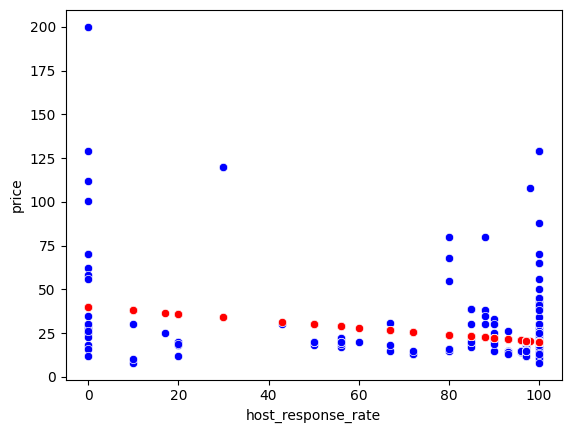

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

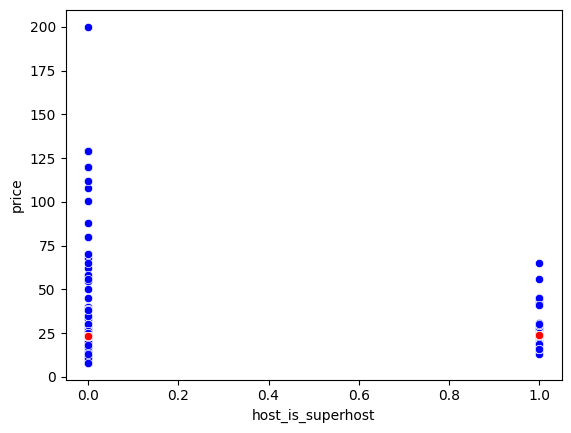

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

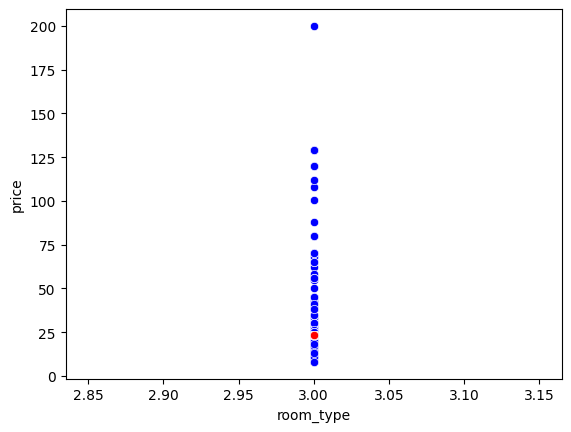

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

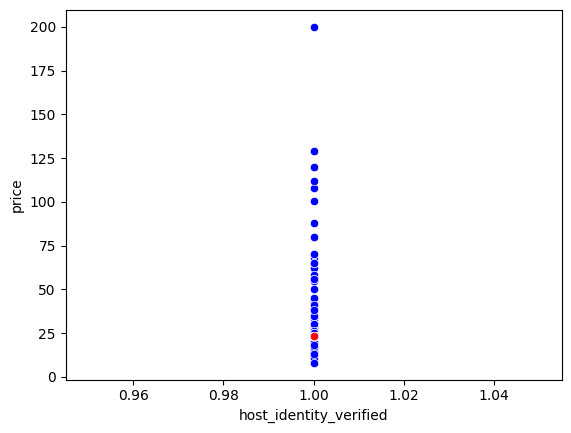

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

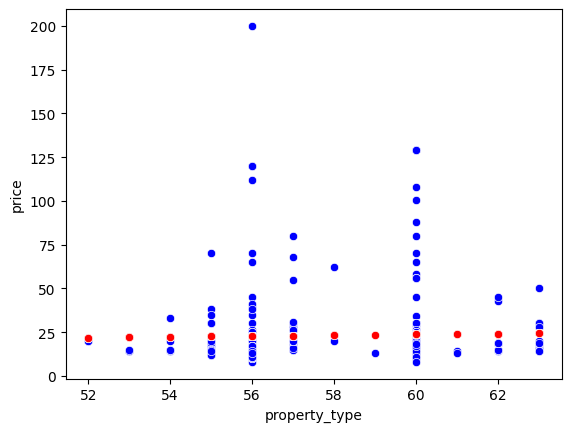

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

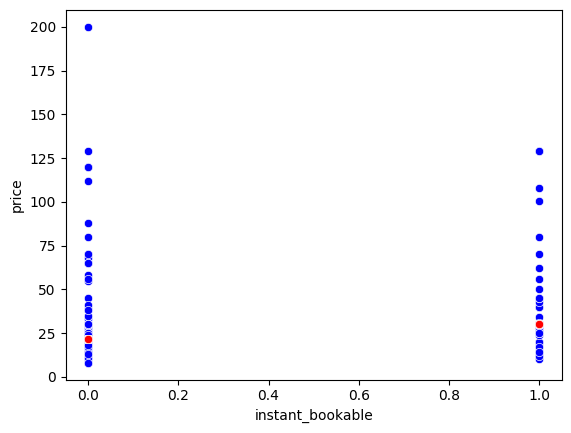

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

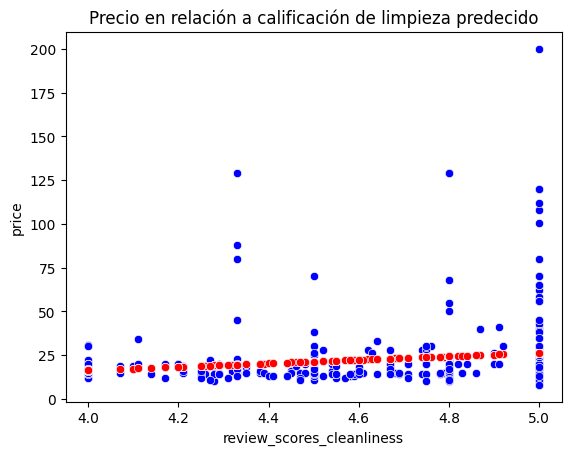

In [53]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

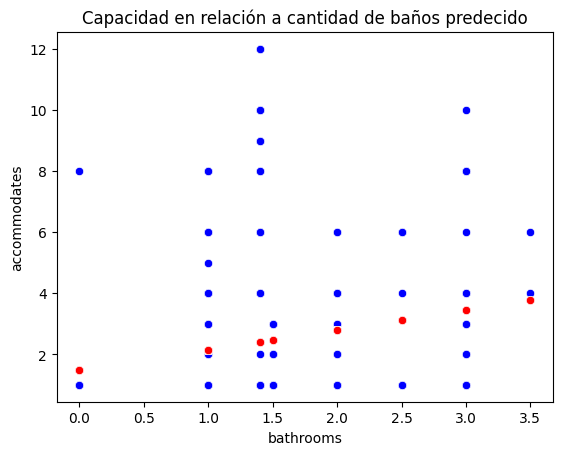

In [54]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**Coeficiente de Determinacion**

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.08988269229868051

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.00010914225291647206

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.0008079892619601292

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.026148628588491762

In [61]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.024873923907338447

In [62]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.039202191614709836

**Coeficientes de correlacion**

In [63]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.2998044234141326)

In [64]:
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.010447116966726852)

In [65]:
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.010447116966726852)

In [66]:
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.0)

In [67]:
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.028425151925014037)

In [68]:
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.161705375879999)

In [69]:
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.1577146914759004)

In [70]:
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.1979954333178163)

In [71]:
#eliminamos room_type y su prediccion 
f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

In [72]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

MemoryError: bad allocation

<Figure size 4000x4000 with 272 Axes>

In [73]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       21
10.0       3
17.0       1
20.0      25
30.0       2
43.0       1
50.0       3
56.0       6
60.0       1
67.0       3
72.0       4
80.0       8
85.0       9
88.0       4
90.0       7
93.0      10
96.0       8
97.0      38
98.0       1
100.0    227
Name: host_response_rate, dtype: int64

In [74]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,-0.126955,NaN,-0.060382,0.218665,0.196970,-0.163658,-1.000000,-0.126955,NaN,-0.060382,0.218665,-0.111132,-0.163658,0.299804,0.196970
Prediccion_host_is_superhost,-0.126955,1.000000,NaN,-0.030672,0.071531,0.118104,0.142389,0.126955,1.000000,NaN,-0.030672,0.071531,-0.000179,0.142389,0.010447,0.118104
Prediccion_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_property_type,-0.060382,-0.030672,NaN,1.000000,0.032634,-0.058201,-0.121601,0.060382,-0.030672,NaN,1.000000,0.032634,-0.166359,-0.121601,0.028425,-0.058201
Prediccion_instant_bookable,0.218665,0.071531,NaN,0.032634,1.000000,0.032558,-0.253082,-0.218665,0.071531,NaN,0.032634,1.000000,-0.236136,-0.253082,0.161705,0.032558
Prediccion_review_scores_cleanliness,0.196970,0.118104,NaN,-0.058201,0.032558,1.000000,-0.026782,-0.196970,0.118104,NaN,-0.058201,0.032558,-0.019686,-0.026782,0.157715,1.000000
Prediccion_bathrooms,-0.163658,0.142389,NaN,-0.121601,-0.253082,-0.026782,1.000000,0.163658,0.142389,NaN,-0.121601,-0.253082,0.197995,1.000000,-0.026008,-0.026782
host_response_rate,-1.000000,0.126955,NaN,0.060382,-0.218665,-0.196970,0.163658,1.000000,0.126955,NaN,0.060382,-0.218665,0.111132,0.163658,-0.299804,-0.196970
host_is_superhost,-0.126955,1.000000,NaN,-0.030672,0.071531,0.118104,0.142389,0.126955,1.000000,NaN,-0.030672,0.071531,-0.000179,0.142389,0.010447,0.118104
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.126955,NaN,0.060382,0.218665,0.196970,0.163658,1.000000,0.126955,NaN,0.060382,0.218665,0.111132,0.163658,0.299804,0.196970
Prediccion_host_is_superhost,0.126955,1.000000,NaN,0.030672,0.071531,0.118104,0.142389,0.126955,1.000000,NaN,0.030672,0.071531,0.000179,0.142389,0.010447,0.118104
Prediccion_host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prediccion_property_type,0.060382,0.030672,NaN,1.000000,0.032634,0.058201,0.121601,0.060382,0.030672,NaN,1.000000,0.032634,0.166359,0.121601,0.028425,0.058201
Prediccion_instant_bookable,0.218665,0.071531,NaN,0.032634,1.000000,0.032558,0.253082,0.218665,0.071531,NaN,0.032634,1.000000,0.236136,0.253082,0.161705,0.032558
Prediccion_review_scores_cleanliness,0.196970,0.118104,NaN,0.058201,0.032558,1.000000,0.026782,0.196970,0.118104,NaN,0.058201,0.032558,0.019686,0.026782,0.157715,1.000000
Prediccion_bathrooms,0.163658,0.142389,NaN,0.121601,0.253082,0.026782,1.000000,0.163658,0.142389,NaN,0.121601,0.253082,0.197995,1.000000,0.026008,0.026782
host_response_rate,1.000000,0.126955,NaN,0.060382,0.218665,0.196970,0.163658,1.000000,0.126955,NaN,0.060382,0.218665,0.111132,0.163658,0.299804,0.196970
host_is_superhost,0.126955,1.000000,NaN,0.030672,0.071531,0.118104,0.142389,0.126955,1.000000,NaN,0.030672,0.071531,0.000179,0.142389,0.010447,0.118104
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

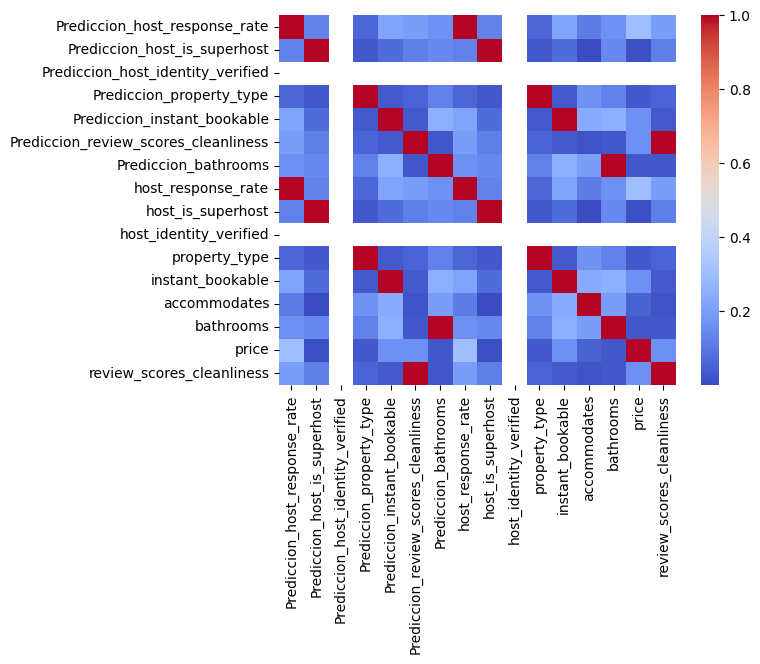

In [76]:
#Graficamos el mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

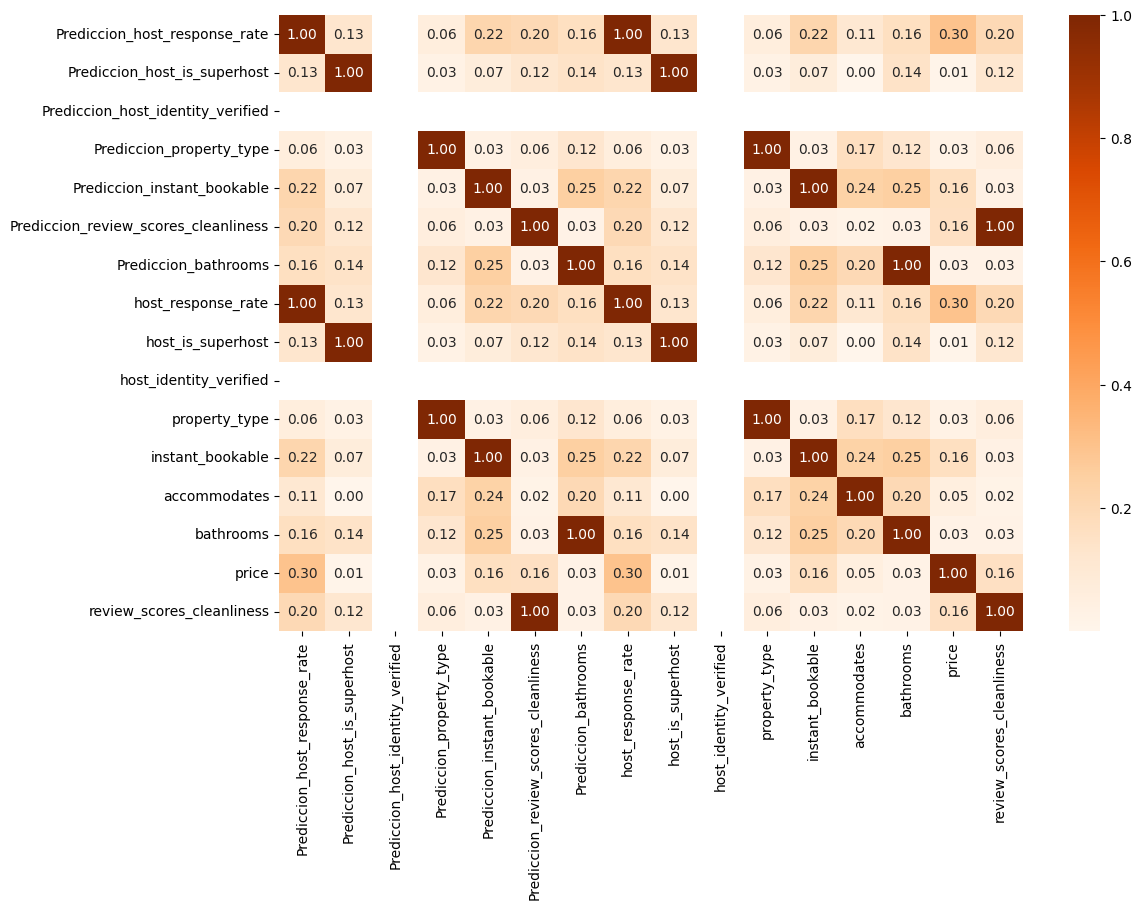

In [77]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [78]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
host_response_rate: R² = 0.0899
bathrooms: R² = 0.0392
instant_bookable: R² = 0.0261
